In [23]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# ACF
from statsmodels.graphics.tsaplots import plot_acf

# Now, all expressions in a cell will be outputted, not just the last one.

In [24]:
stock_df = pd.read_csv("./individual_book_train/stock_1.csv")

stock_df.info()
stock_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507532 entries, 0 to 1507531
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   time_id            1507532 non-null  int64  
 1   seconds_in_bucket  1507532 non-null  int64  
 2   bid_price1         1507532 non-null  float64
 3   ask_price1         1507532 non-null  float64
 4   bid_price2         1507532 non-null  float64
 5   ask_price2         1507532 non-null  float64
 6   bid_size1          1507532 non-null  int64  
 7   ask_size1          1507532 non-null  int64  
 8   bid_size2          1507532 non-null  int64  
 9   ask_size2          1507532 non-null  int64  
 10  stock_id           1507532 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 126.5 MB


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1


In [26]:
stock_df["wap1"]=(stock_df['bid_price1'] * stock_df['ask_size1'] + stock_df['ask_price1'] * stock_df['bid_size1'])/(stock_df['bid_size1'] + stock_df['ask_size1'])
stock_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap1
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115
...,...,...,...,...,...,...,...,...,...,...,...,...
1507527,32767,588,0.998911,0.999109,0.998812,0.999208,126,42,101,100,1,0.999060
1507528,32767,589,0.998911,0.999109,0.998812,0.999208,126,126,101,200,1,0.999010
1507529,32767,591,0.998911,0.999109,0.998812,0.999208,126,226,101,200,1,0.998982
1507530,32767,592,0.998911,0.999109,0.998812,0.999208,226,225,101,100,1,0.999011


In [27]:
stock_df["wap2"]=(stock_df['bid_price2'] * stock_df['ask_size2'] + stock_df['ask_price2'] * stock_df['bid_size2'])/(stock_df['bid_size2'] + stock_df['ask_size2'])

In [28]:
def visualize_price_in_time_id(stock_df,time_id: int):
    df_grouped=stock_df.groupby("time_id")
    df = df_grouped.get_group(time_id)

    plt.figure(figsize=(14,8))
    sns.lineplot(data=df, x='seconds_in_bucket', y='bid_price1', color='green', label='Bid Price')
    sns.lineplot(data=df, x='seconds_in_bucket', y='ask_price1', color='red', label='Ask Price')
    sns.lineplot(data=df, x='seconds_in_bucket', y='wap1', color='blue', label='WAP')

    plt.title(f"Time ID: {time_id}", fontsize=20)
    plt.xlabel('Seconds in Bucket', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.legend(loc='upper right', fontsize=16)
    
    plt.show()

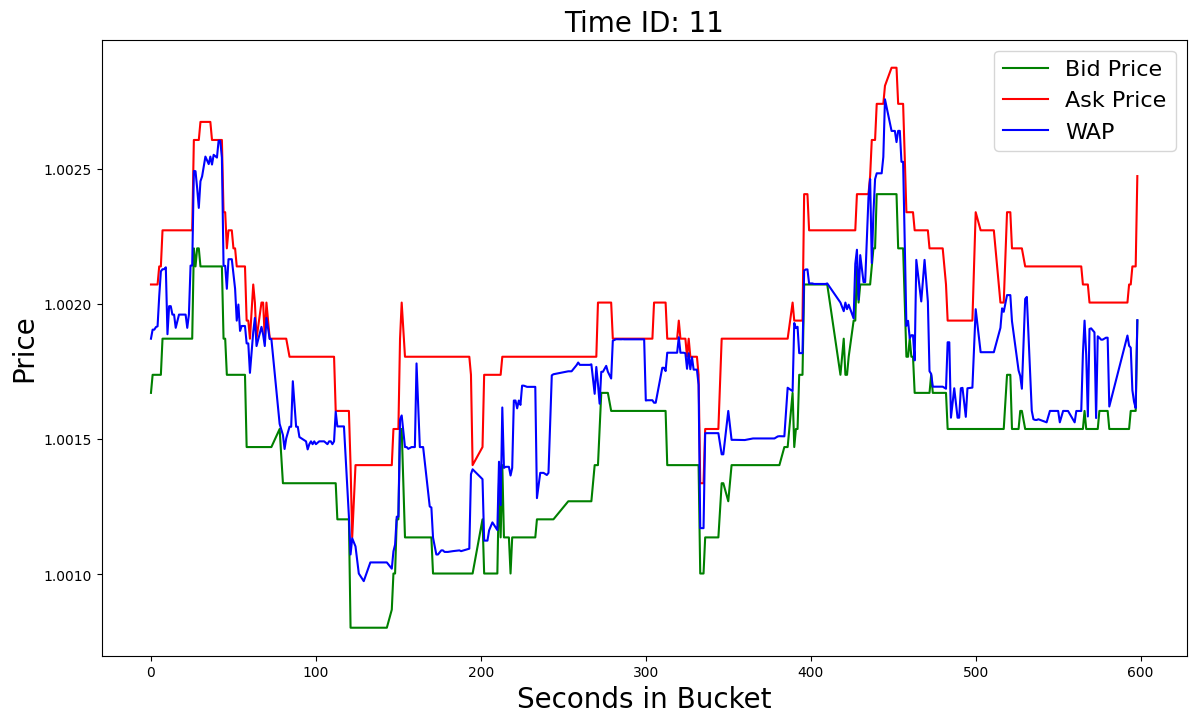

In [29]:
visualize_price_in_time_id(stock_df,11)

In [30]:
stock_df["log_ret1"]=np.log(stock_df['wap1']).diff()
stock_df["log_ret2"]=np.log(stock_df['wap2']).diff()

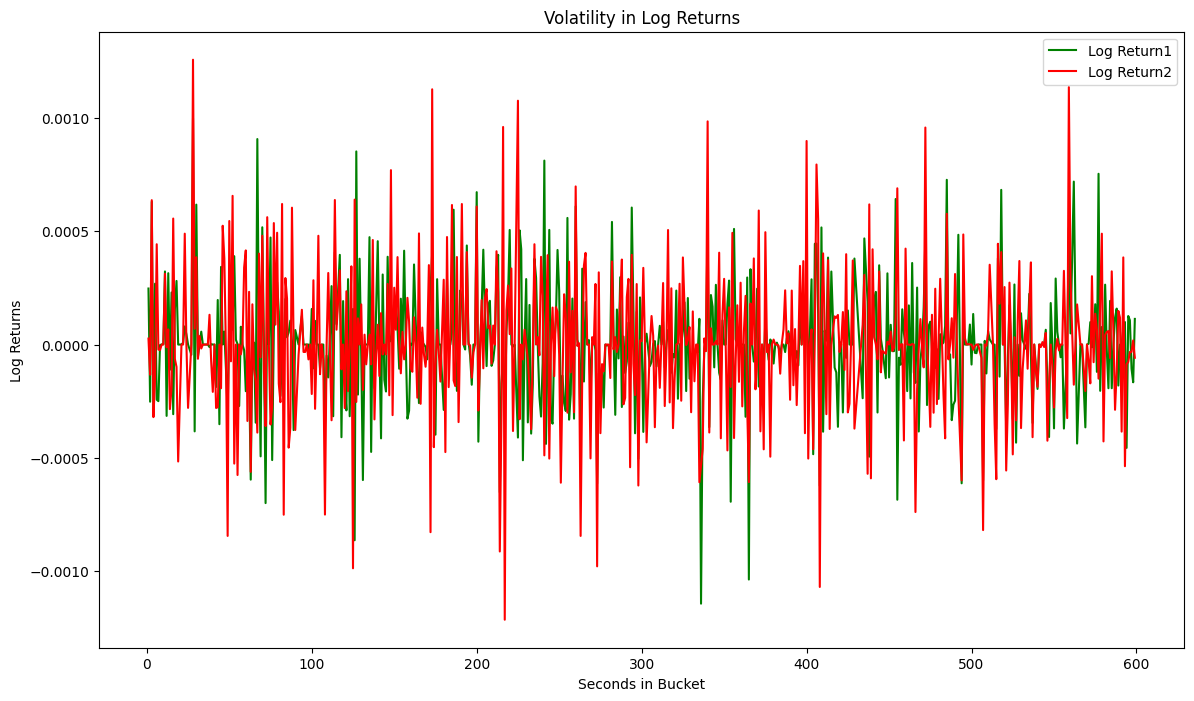

In [31]:
def visualize_log_returns_in_time_id(stock_df,time_id: int):
   
    df_grouped=stock_df.groupby("time_id")
    df = df_grouped.get_group(time_id)
    plt.figure(figsize=(14,8))
    sns.lineplot(data=df, x='seconds_in_bucket', y='log_ret1', color='green', label='Log Return1')
    sns.lineplot(data=df, x='seconds_in_bucket', y='log_ret2', color='red', label='Log Return2')

    plt.ylabel('Log Returns')
    plt.xlabel('Seconds in Bucket')
    plt.title('Volatility in Log Returns')

    plt.show()

# Applied Function
visualize_log_returns_in_time_id(stock_df,5)


In [16]:
stock_df.seconds_in_bucket.max(),stock_df.seconds_in_bucket.min()

(599, 0)

In [17]:
stock_df.head(100)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap1,wap2,log_ret1,log_ret2
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785,1.000873,NaN,NaN
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032,1.000899,0.000247,0.000026
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780,1.000765,-0.000252,-0.000133
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411,1.001403,0.000630,0.000637
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115,1.001083,-0.000295,-0.000320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,101,1.002329,1.002854,1.001936,1.002985,100,25,25,25,1,1.002749,1.002460,-0.000105,0.000284
96,5,102,1.002329,1.002985,1.002067,1.003051,100,25,25,200,1,1.002854,1.002176,0.000105,-0.000284
97,5,103,1.002329,1.002985,1.002067,1.003051,100,25,25,200,1,1.002854,1.002176,0.000000,0.000000
98,5,104,1.002329,1.002985,1.002198,1.003116,100,25,25,25,1,1.002854,1.002657,0.000000,0.000480


In [40]:
stock_df["time_inv"]=np.ceil(stock_df["seconds_in_bucket"]/30)

In [42]:
stock_df["volativity"]=stock_df.groupby(["time_id","time_inv"])['log_ret1'].transform(lambda x: np.sqrt(np.sum(x**2)))

In [45]:
stock_df.head(100)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap1,wap2,log_ret1,log_ret2,time_inv,volativity
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785,1.000873,NaN,NaN,0.0,0.000000
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032,1.000899,0.000247,0.000026,1.0,0.001703
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780,1.000765,-0.000252,-0.000133,1.0,0.001703
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411,1.001403,0.000630,0.000637,1.0,0.001703
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115,1.001083,-0.000295,-0.000320,1.0,0.001703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,101,1.002329,1.002854,1.001936,1.002985,100,25,25,25,1,1.002749,1.002460,-0.000105,0.000284,4.0,0.000978
96,5,102,1.002329,1.002985,1.002067,1.003051,100,25,25,200,1,1.002854,1.002176,0.000105,-0.000284,4.0,0.000978
97,5,103,1.002329,1.002985,1.002067,1.003051,100,25,25,200,1,1.002854,1.002176,0.000000,0.000000,4.0,0.000978
98,5,104,1.002329,1.002985,1.002198,1.003116,100,25,25,25,1,1.002854,1.002657,0.000000,0.000480,4.0,0.000978


In [47]:
stock_df["spread_1"]=stock_df["ask_price1"]-stock_df["bid_price1"]
stock_df["spread_2"]=stock_df["ask_price2"]-stock_df["bid_price2"]

In [54]:
stock_df[stock_df["time_id"]==5].copy()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap1,wap2,log_ret1,log_ret2,time_inv,volativity,spread_1,spread_2
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785,1.000873,NaN,NaN,0.0,0.000000,0.000787,0.000918
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032,1.000899,0.000247,0.000026,1.0,0.001703,0.000919,0.001050
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780,1.000765,-0.000252,-0.000133,1.0,0.001703,0.000656,0.000853
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411,1.001403,0.000630,0.000637,1.0,0.001703,0.000787,0.000918
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115,1.001083,-0.000295,-0.000320,1.0,0.001703,0.000722,0.000919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,5,595,1.002592,1.003379,1.002460,1.003576,61,20,25,25,1,1.003185,1.003018,0.000126,-0.000077,20.0,0.001111,0.000787,0.001115
571,5,596,1.002592,1.003379,1.002460,1.003510,161,20,25,25,1,1.003292,1.002985,0.000107,-0.000033,20.0,0.001111,0.000787,0.001050
572,5,597,1.002592,1.003379,1.002460,1.003445,61,20,25,25,1,1.003185,1.002952,-0.000107,-0.000033,20.0,0.001111,0.000787,0.000984
573,5,598,1.002592,1.003313,1.002460,1.003379,36,25,25,20,1,1.003018,1.002971,-0.000167,0.000018,20.0,0.001111,0.000722,0.000919


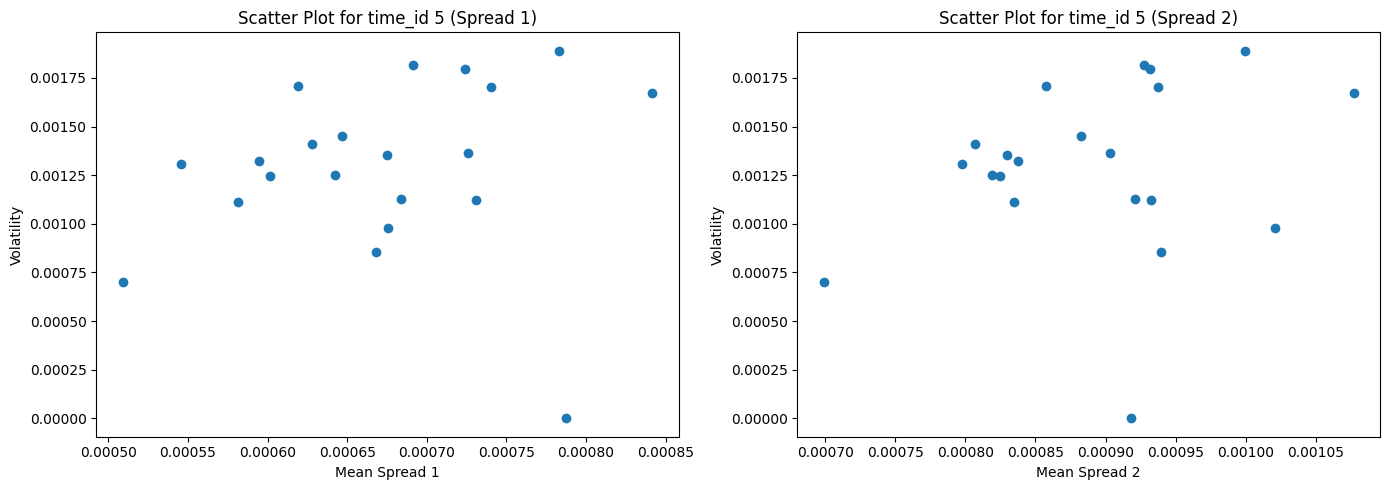

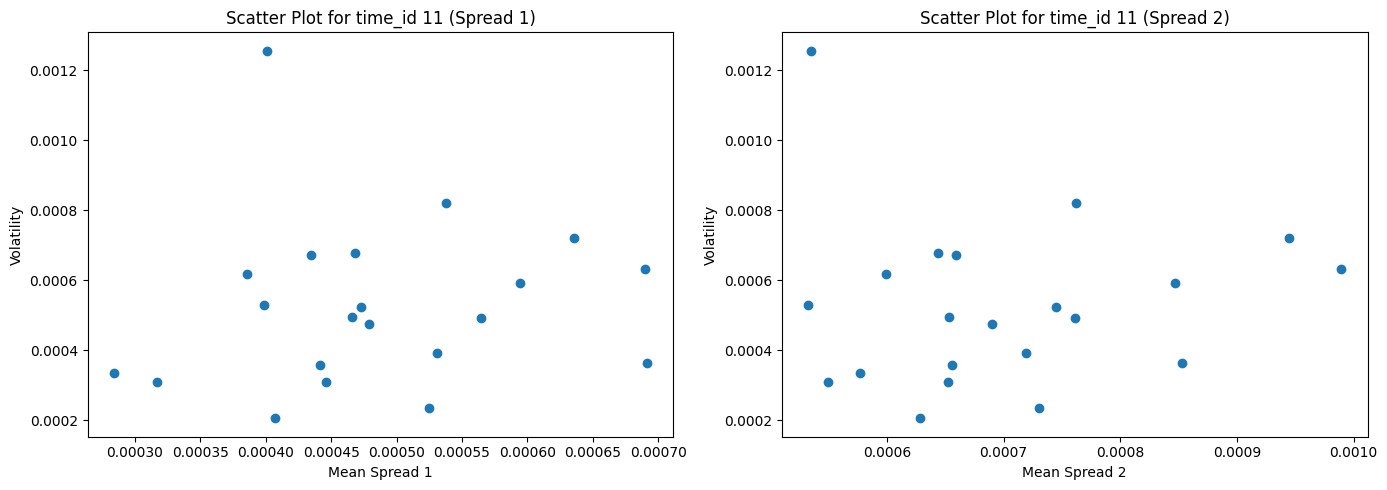

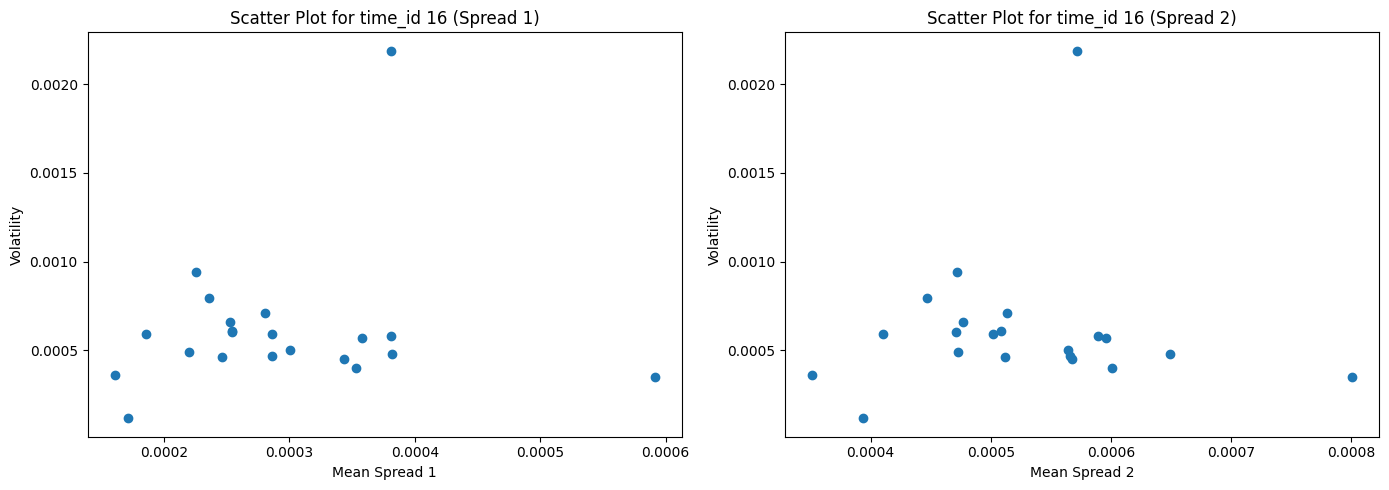

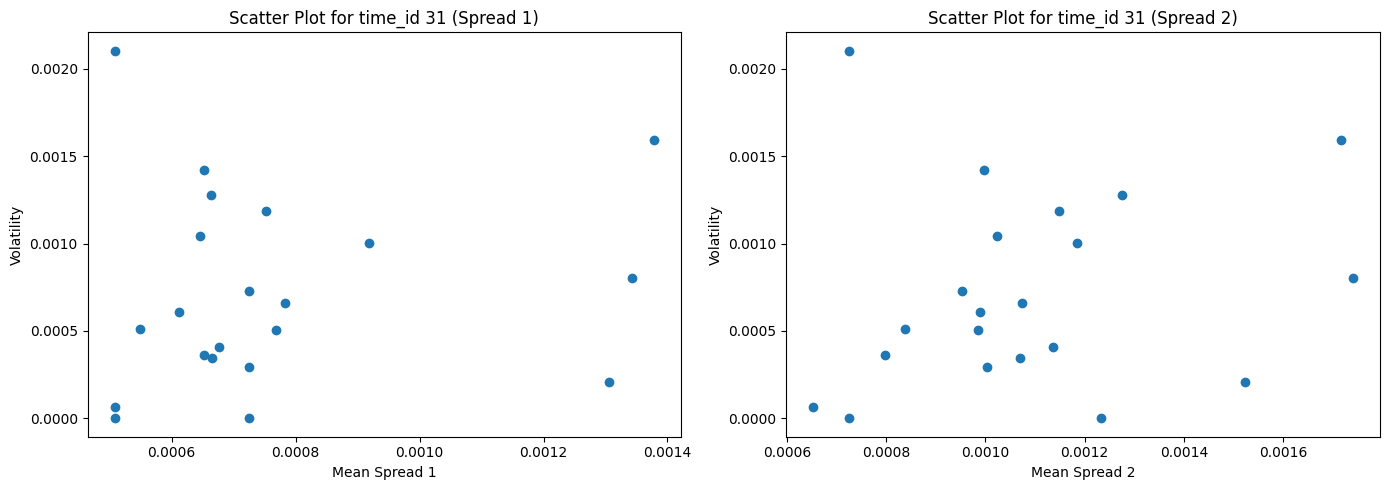

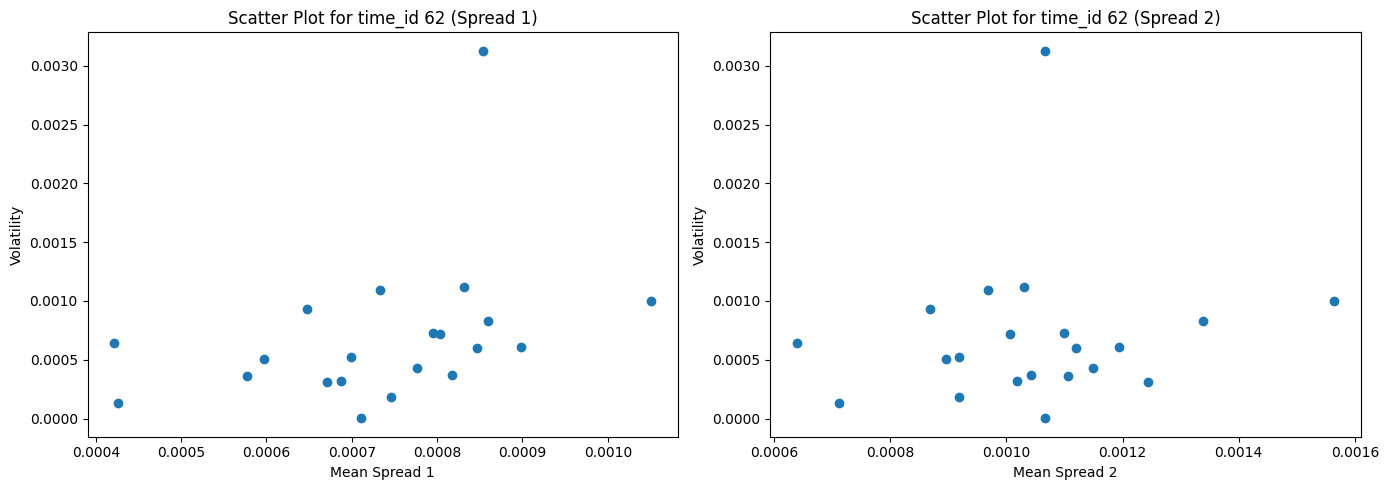

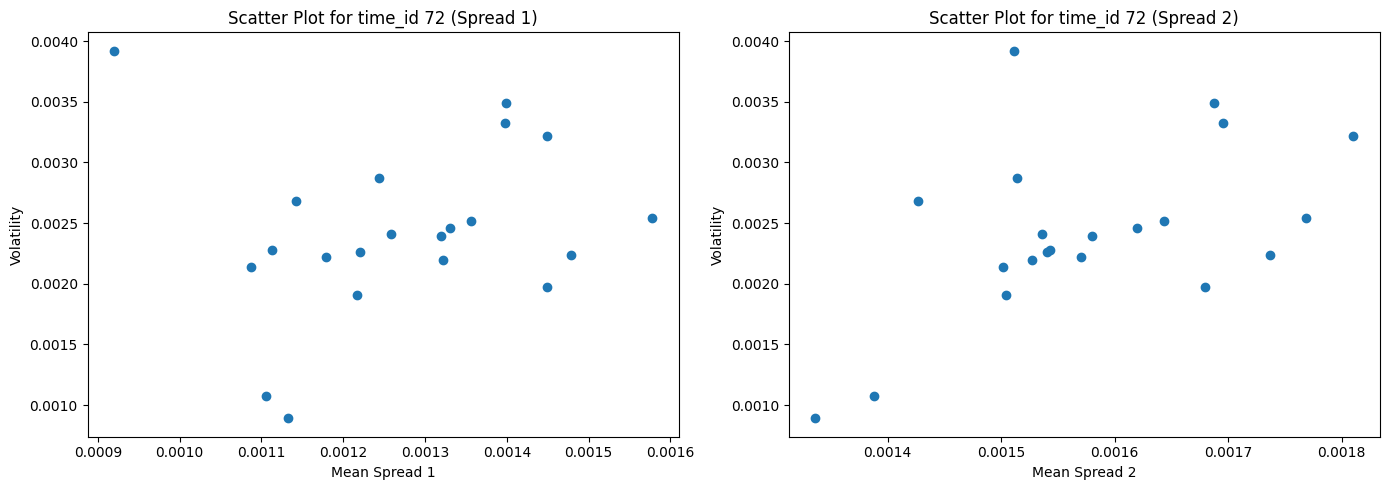

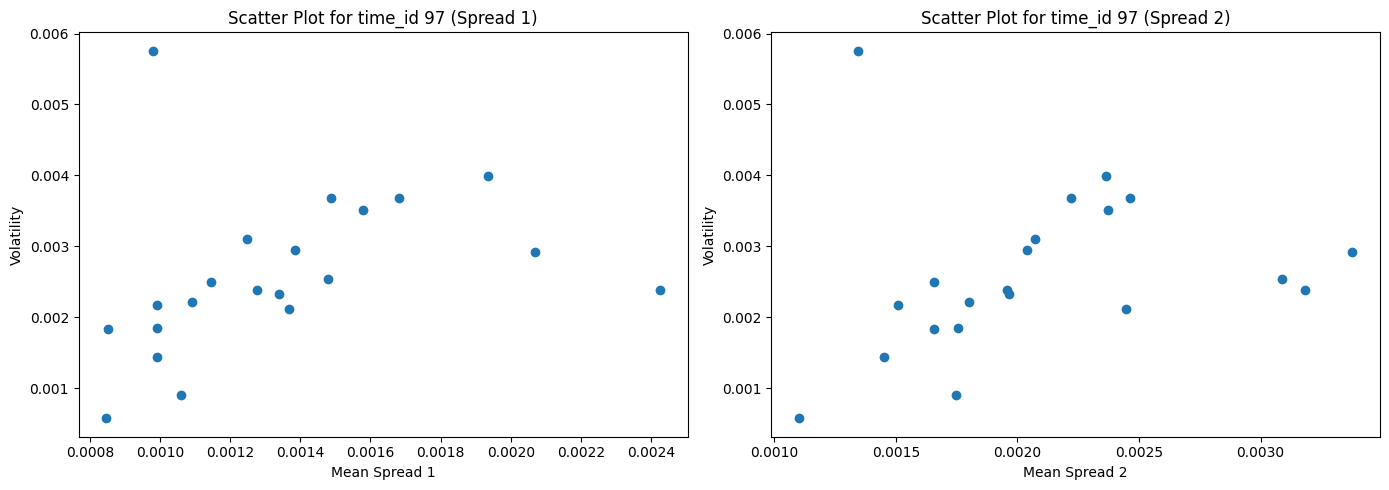

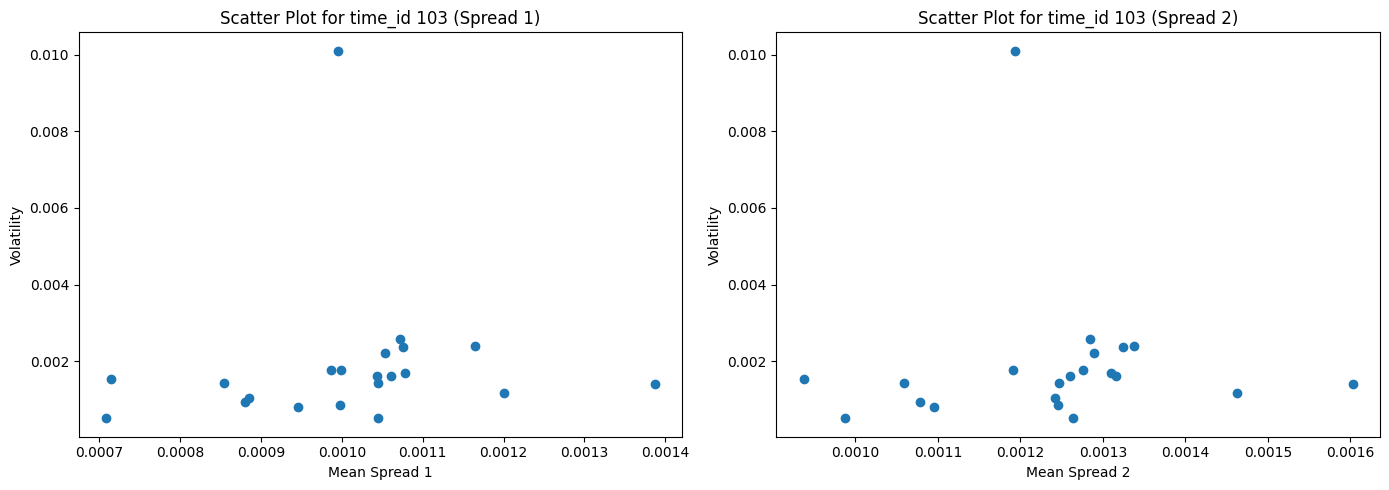

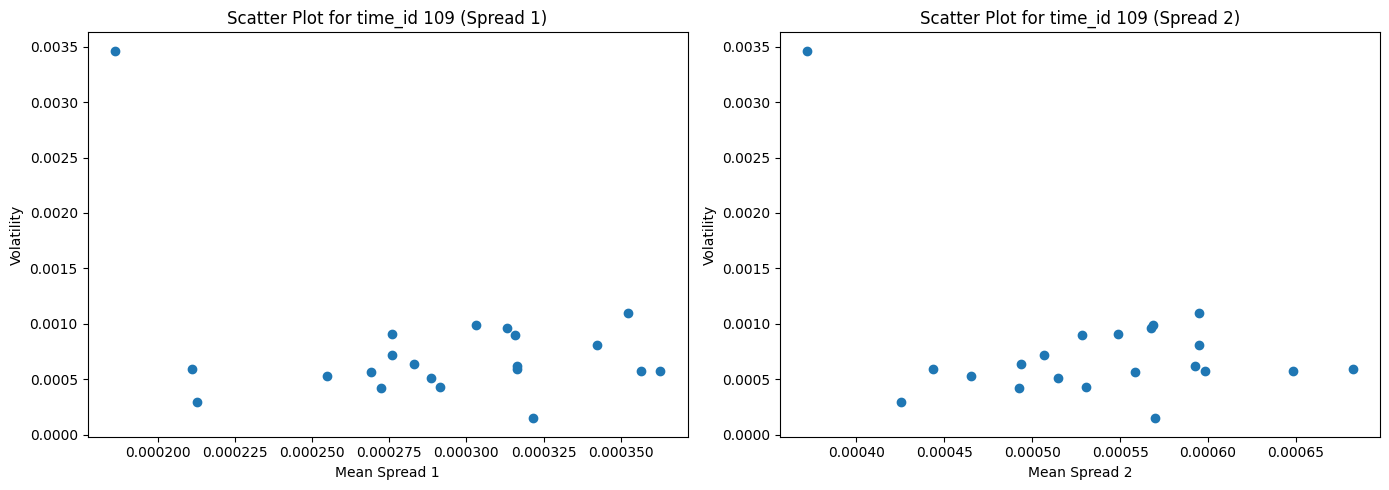

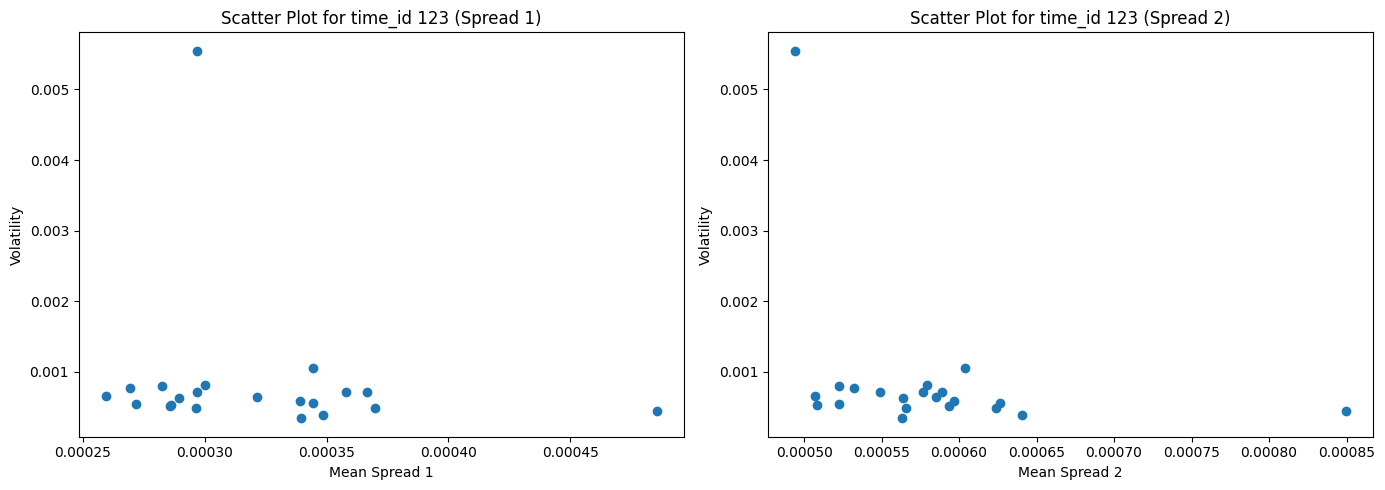

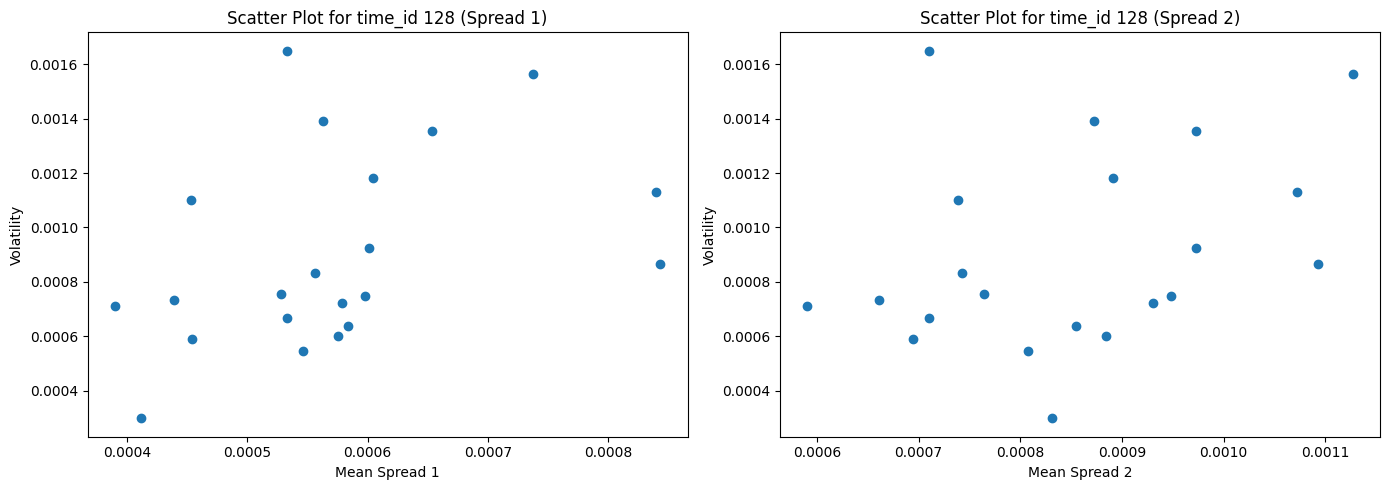

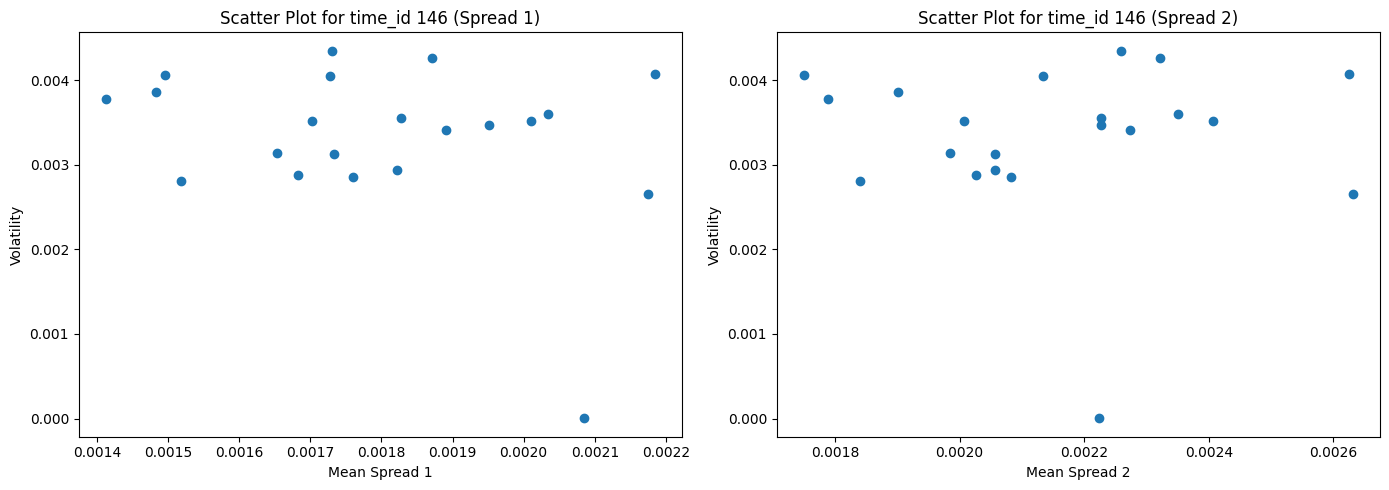

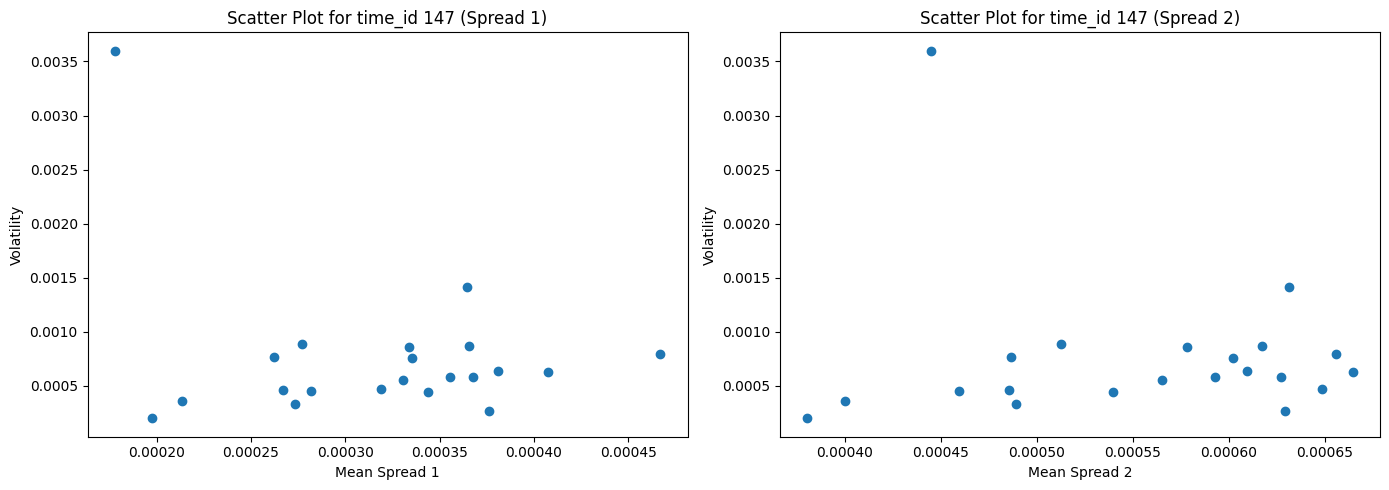

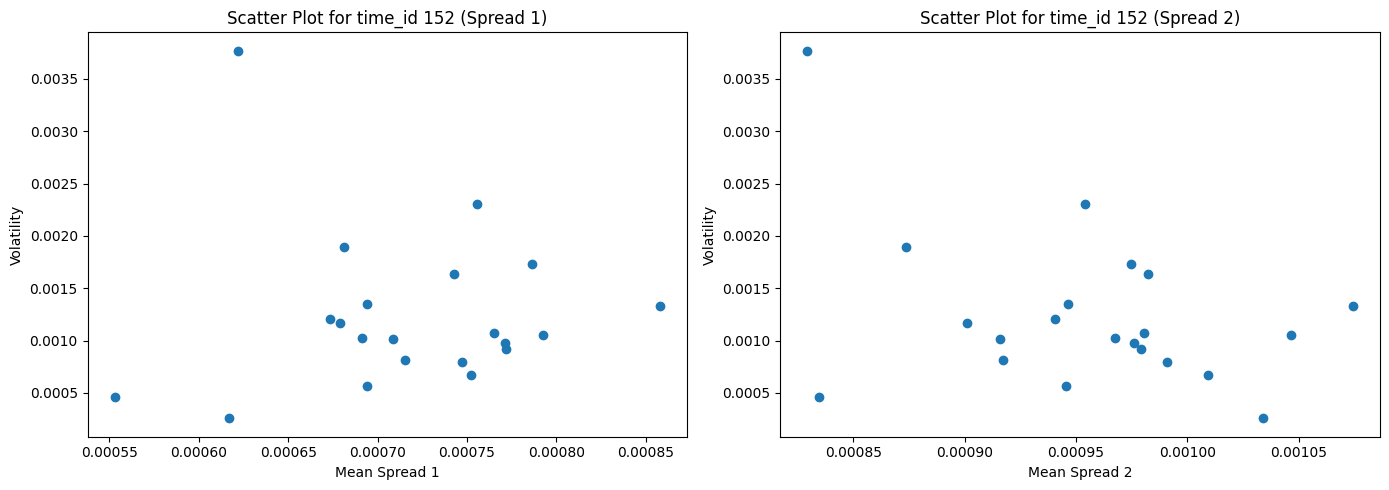

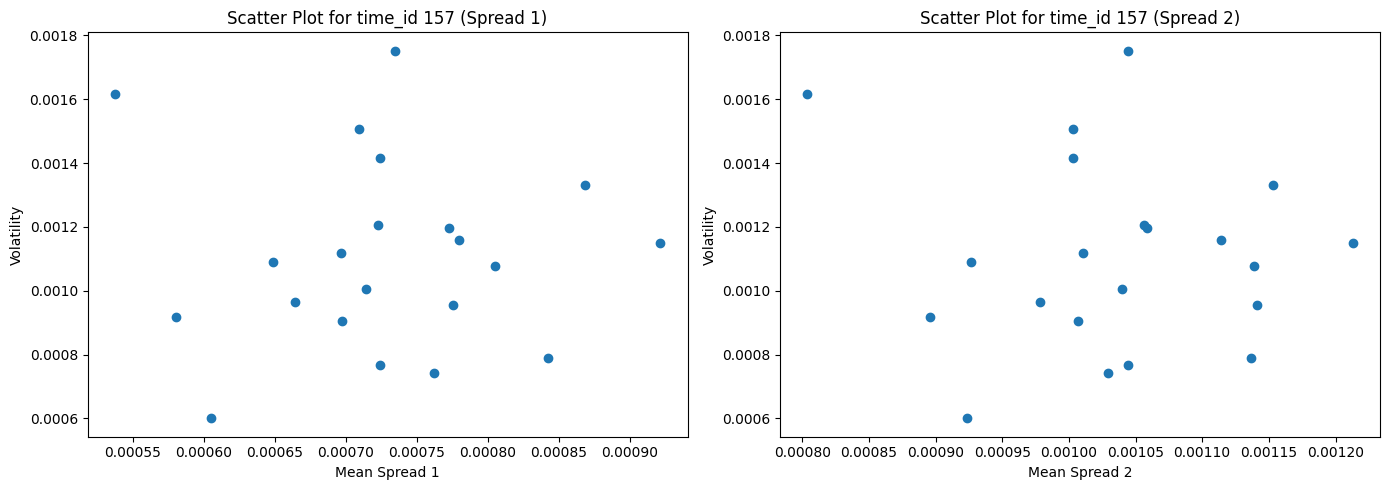

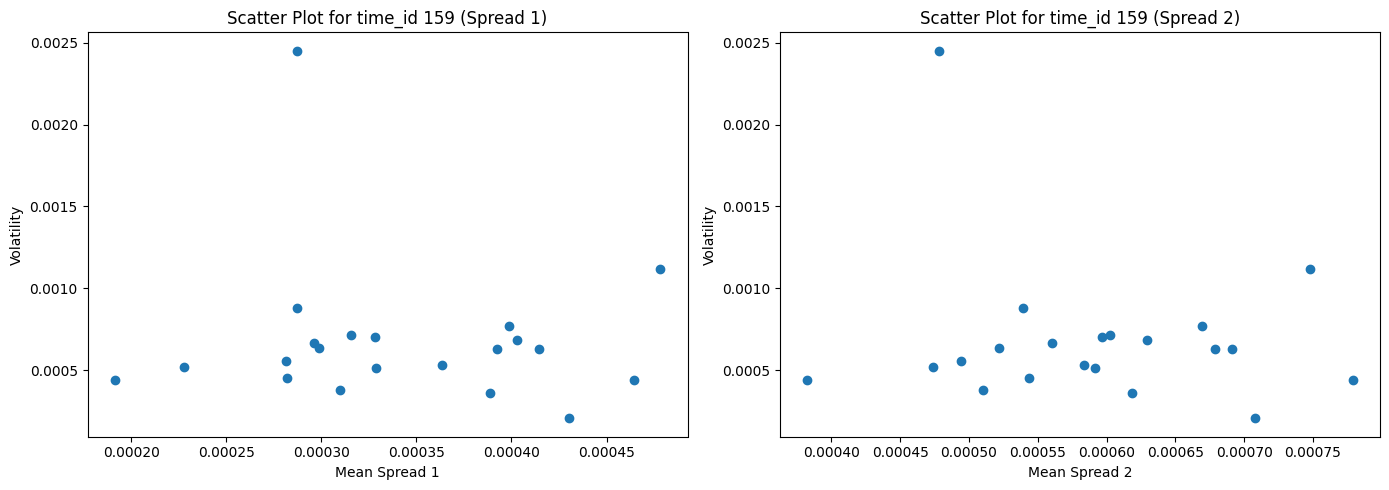

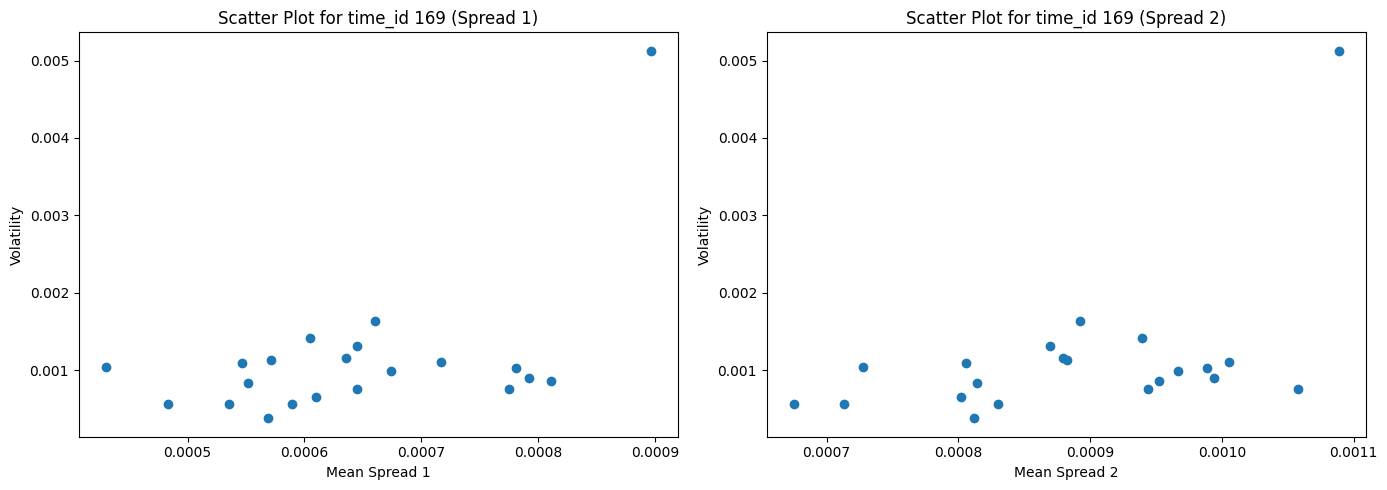

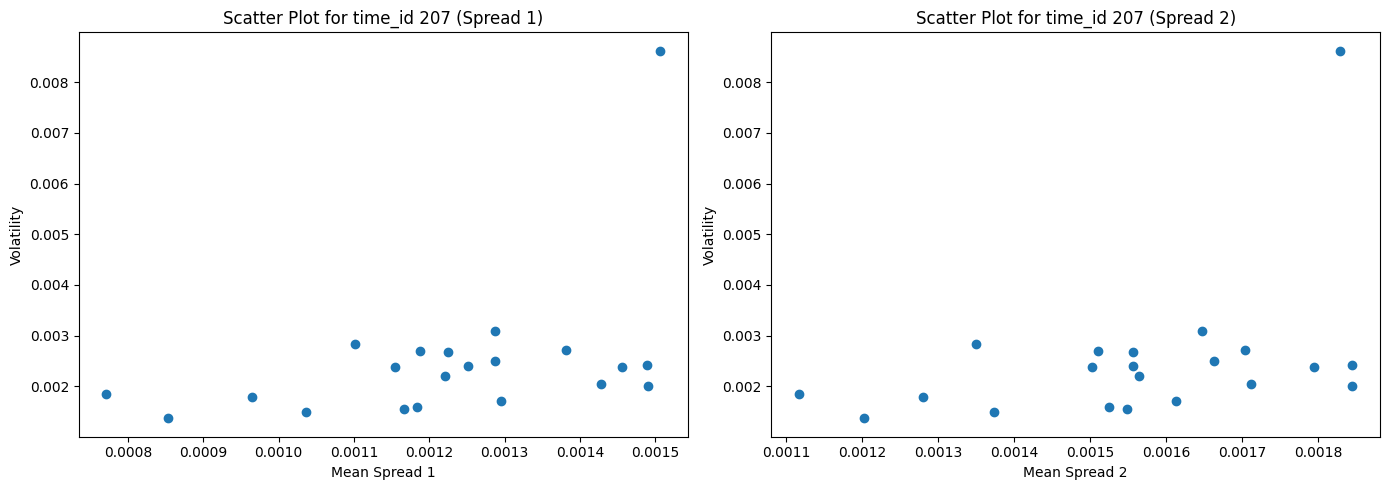

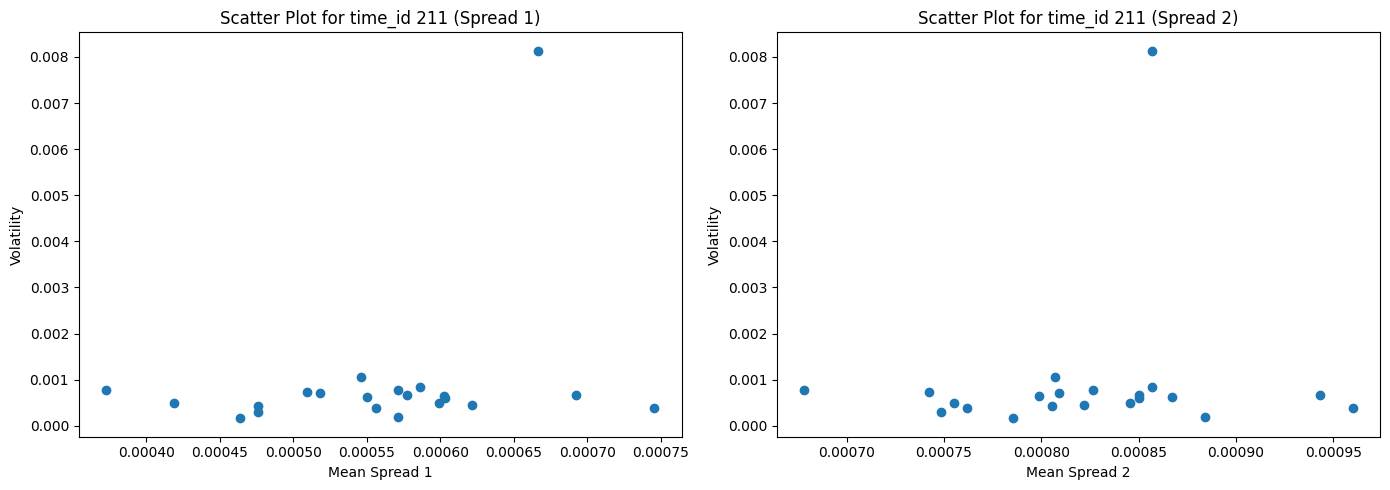

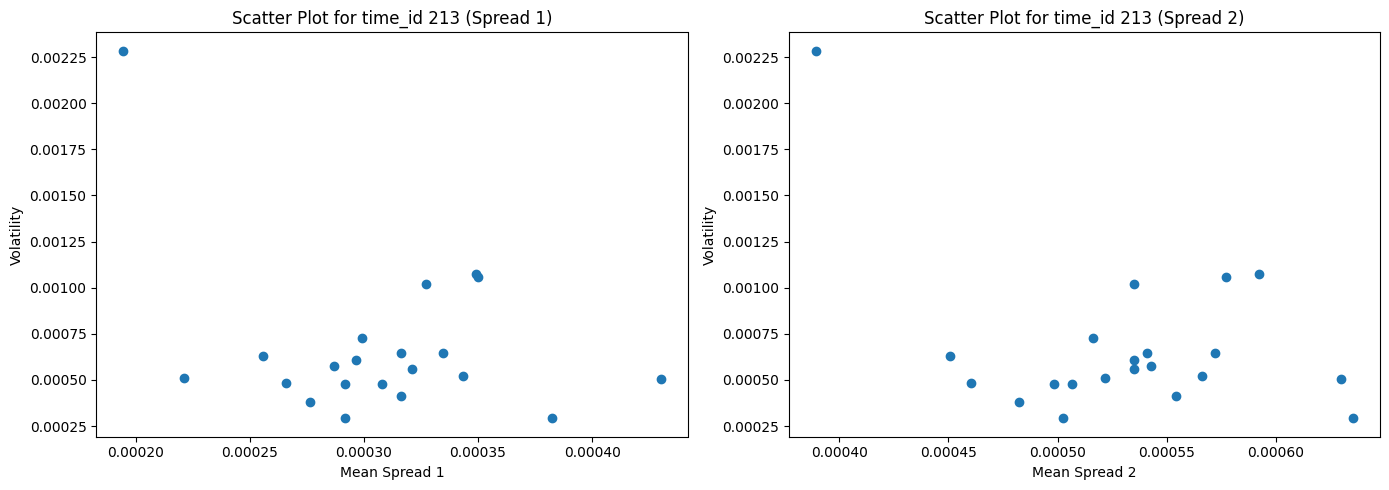

In [63]:
for time_id in stock_df["time_id"].unique()[:20]:
    # Create a temporary DataFrame for the specific time_id
    temp_df = stock_df[stock_df["time_id"] == time_id].copy()
    
    # Calculate the mean spreads for 'spread_1' and 'spread_2' within each 'time_inv'
    temp_df["mean_spread1"] = temp_df.groupby("time_inv")["spread_1"].transform('mean')
    temp_df["mean_spread2"] = temp_df.groupby("time_inv")["spread_2"].transform('mean')
    
    # Drop duplicates to avoid repeating the same mean spread values
    temp_df = temp_df.drop_duplicates(subset=['time_inv'])

    # Initialize a new figure with two subplots (1 row, 2 columns)
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Create scatter plots for mean_spread1 and mean_spread2
    axs[0].scatter(temp_df["mean_spread1"], temp_df["volativity"])
    axs[1].scatter(temp_df["mean_spread2"], temp_df["volativity"])

    # Set titles and labels for the subplots
    axs[0].set_title(f'Scatter Plot for time_id {time_id} (Spread 1)')
    axs[0].set_xlabel('Mean Spread 1')
    axs[0].set_ylabel('Volatility')
    
    axs[1].set_title(f'Scatter Plot for time_id {time_id} (Spread 2)')
    axs[1].set_xlabel('Mean Spread 2')
    axs[1].set_ylabel('Volatility')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()



In [64]:
stock_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,wap1,wap2,log_ret1,log_ret2,time_inv,volativity,spread_1,spread_2
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100,1,1.000785,1.000873,NaN,NaN,0.0,0.000000,0.000787,0.000918
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100,1,1.001032,1.000899,0.000247,0.000026,1.0,0.001703,0.000919,0.001050
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125,1,1.000780,1.000765,-0.000252,-0.000133,1.0,0.001703,0.000656,0.000853
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36,1,1.001411,1.001403,0.000630,0.000637,1.0,0.001703,0.000787,0.000918
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25,1,1.001115,1.001083,-0.000295,-0.000320,1.0,0.001703,0.000722,0.000919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507527,32767,588,0.998911,0.999109,0.998812,0.999208,126,42,101,100,1,0.999060,0.999011,-0.000025,-0.000249,20.0,0.000230,0.000198,0.000396
1507528,32767,589,0.998911,0.999109,0.998812,0.999208,126,126,101,200,1,0.999010,0.998945,-0.000050,-0.000066,20.0,0.000230,0.000198,0.000396
1507529,32767,591,0.998911,0.999109,0.998812,0.999208,126,226,101,200,1,0.998982,0.998945,-0.000028,0.000000,20.0,0.000230,0.000198,0.000396
1507530,32767,592,0.998911,0.999109,0.998812,0.999208,226,225,101,100,1,0.999011,0.999011,0.000028,0.000066,20.0,0.000230,0.000198,0.000396


for each stock_id, we have time id ranges from 5 to 10000, for each time id, we divide them into 30, so each time id has 600 seconds, which is 20 data points, these 20 data points, we can include mean, variance, quantile for each feature features and label is the next time volativity


In [ ]:
for time_id in stock_df["time_id"].unique():
    for time_inv in stock_df["time_inv"].unique()